In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ecommerce_customer_behavior_dataset_v2.csv')

df.head()

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_000001-1,CUST_00001,2023-05-29,40,Male,Ankara,Books,29.18,1,0.00,29.18,Digital Wallet,Mobile,14,9,True,13,4
1,ORD_000001-2,CUST_00001,2023-10-12,40,Male,Ankara,Home & Garden,644.40,1,138.05,506.35,Credit Card,Desktop,14,8,True,6,2
2,ORD_000001-3,CUST_00001,2023-12-05,40,Male,Ankara,Sports,332.82,5,0.00,1664.10,Credit Card,Mobile,15,10,True,9,4
3,ORD_000002-1,CUST_00002,2023-05-11,33,Male,Istanbul,Food,69.30,5,71.05,275.45,Digital Wallet,Desktop,16,13,True,4,4
4,ORD_000002-2,CUST_00002,2023-06-16,33,Male,Istanbul,Beauty,178.15,3,0.00,534.45,Credit Card,Mobile,14,7,True,6,4


In [3]:
# Total Number of Orders

len(df)

17049

In [4]:
# Total Number of customer

df["Customer_ID"].nunique()

5000

In [5]:
# Total Number of City

df["City"].nunique()

10

In [6]:
# Total Number of Product_Category

df["Product_Category"].nunique()

8

In [7]:
df.shape

(17049, 18)

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
 # Data Type of each column

df.dtypes

Order_ID                            object
Customer_ID                         object
Date                        datetime64[ns]
Age                                  int64
Gender                              object
City                                object
Product_Category                    object
Unit_Price                         float64
Quantity                             int64
Discount_Amount                    float64
Total_Amount                       float64
Payment_Method                      object
Device_Type                         object
Session_Duration_Minutes             int64
Pages_Viewed                         int64
Is_Returning_Customer                 bool
Delivery_Time_Days                   int64
Customer_Rating                      int64
dtype: object

In [10]:
# Count missing values per column

df.isna().sum()

Order_ID                    0
Customer_ID                 0
Date                        0
Age                         0
Gender                      0
City                        0
Product_Category            0
Unit_Price                  0
Quantity                    0
Discount_Amount             0
Total_Amount                0
Payment_Method              0
Device_Type                 0
Session_Duration_Minutes    0
Pages_Viewed                0
Is_Returning_Customer       0
Delivery_Time_Days          0
Customer_Rating             0
dtype: int64

In [11]:
# filtering Categorical and Numeric value

categorical_features = df.columns[df.dtypes == object].tolist()

print(categorical_features)

numeric_features = df.columns[~(df.dtypes == object)].tolist()

print(numeric_features)

['Order_ID', 'Customer_ID', 'Gender', 'City', 'Product_Category', 'Payment_Method', 'Device_Type']
['Date', 'Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount', 'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer', 'Delivery_Time_Days', 'Customer_Rating']


In [12]:
# Summary statistics for numeric columns

df[numeric_features].describe().T

,count,mean,min,25%,50%,75%,max,std
Date,17049,2023-08-15 01:33:09.723737344,2023-01-01 00:00:00,2023-04-26 00:00:00,2023-08-16 00:00:00,2023-12-06 00:00:00,2024-03-25 00:00:00,NaN
Age,17049.0,34.945745,18.0,26.0,35.0,42.0,75.0,11.046855
Unit_Price,17049.0,447.901689,5.05,73.26,174.68,494.57,7900.01,722.319705
Quantity,17049.0,3.011379,1.0,2.0,3.0,4.0,5.0,1.417027
Discount_Amount,17049.0,69.788135,0.0,0.0,0.0,32.71,6538.29,240.704662
Total_Amount,17049.0,1277.438711,6.21,172.97,455.85,1267.75,37852.05,2358.436375
Session_Duration_Minutes,17049.0,14.535633,4.0,13.0,15.0,17.0,26.0,2.925524
Pages_Viewed,17049.0,9.003109,1.0,7.0,9.0,11.0,18.0,2.259954
Delivery_Time_Days,17049.0,6.503607,1.0,4.0,6.0,8.0,25.0,3.488787
Customer_Rating,17049.0,3.899408,1.0,3.0,4.0,5.0,5.0,1.128803


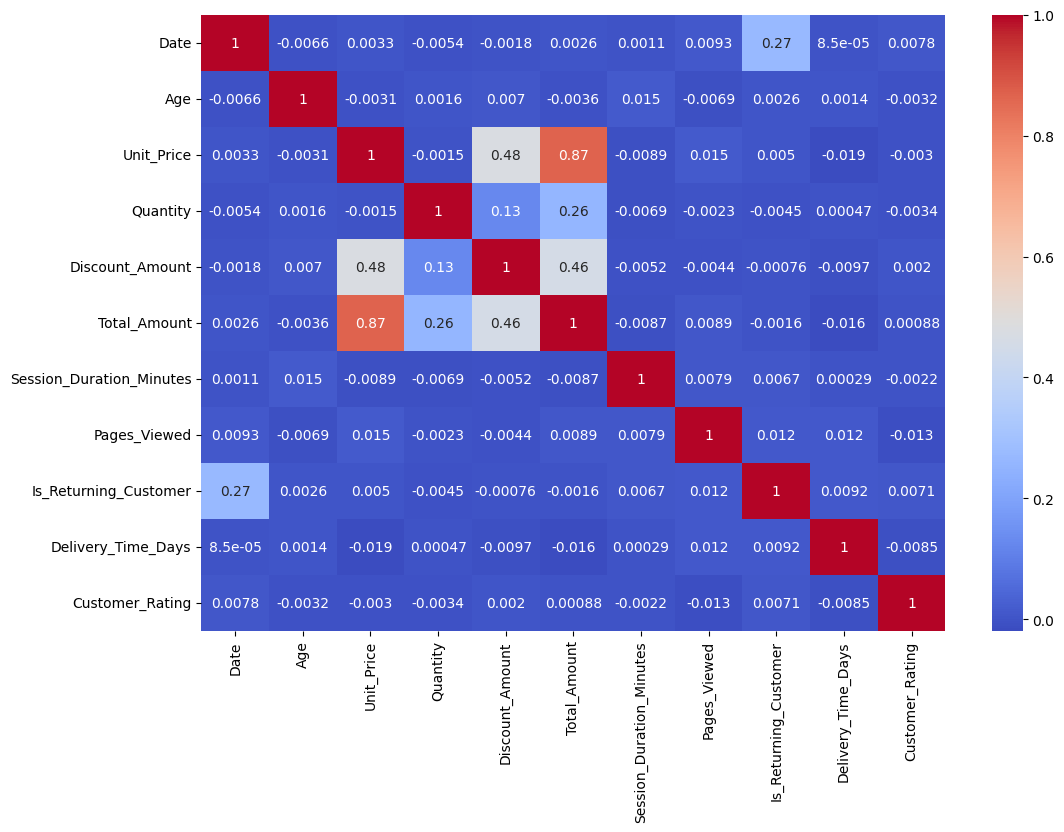

In [13]:
# correlation matrix

corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")
plt.show()

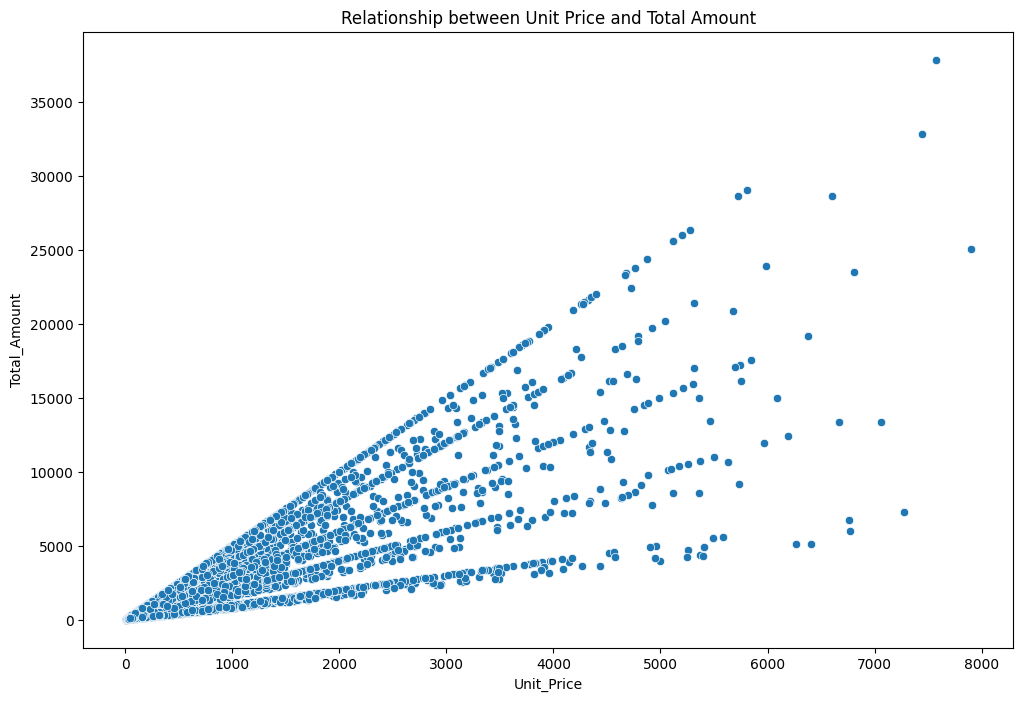

In [14]:

plt.figure(figsize=(12, 8))

sns.scatterplot(x='Unit_Price', y='Total_Amount', data=df)
plt.title("Relationship between Unit Price and Total Amount")
plt.show()

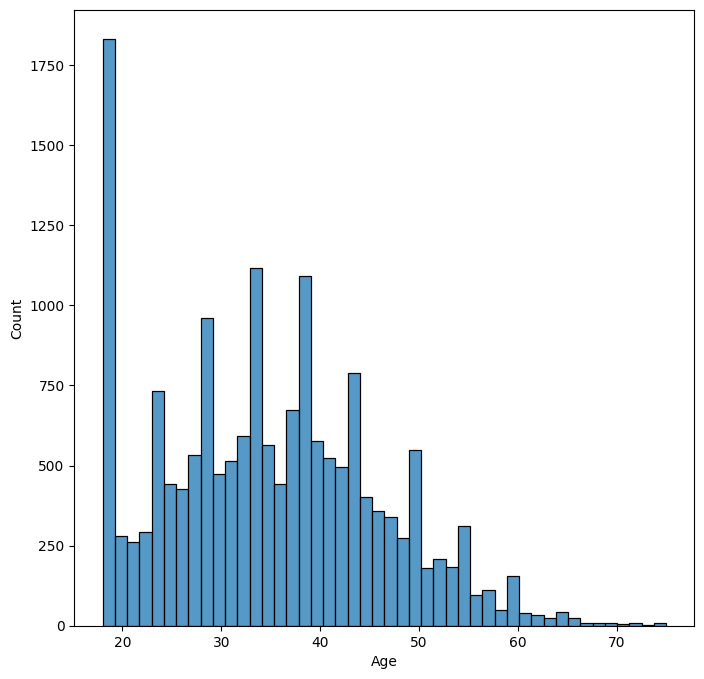

In [15]:
plt.figure(figsize=(8, 8))

sns.histplot(x= df['Age'])
plt.show()

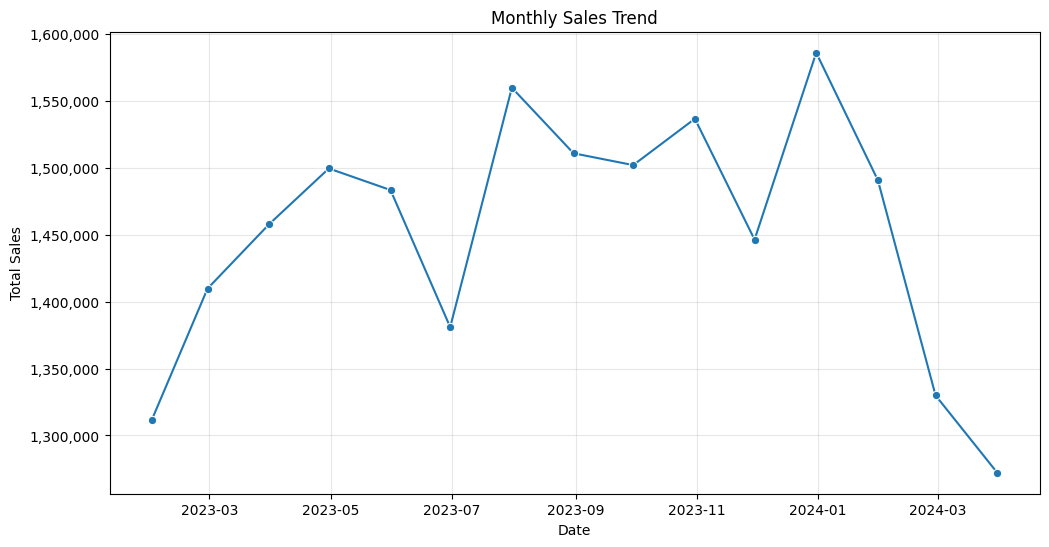

In [16]:
import matplotlib.ticker as mtick

sales = df.groupby(pd.Grouper(key="Date", freq = "ME"))["Total_Amount"].sum()

# sales.plot(figsize=(12, 6), marker ='o')

plt.figure(figsize=(12, 6))
sns.lineplot(x=sales.index, y=sales.values,  marker ='o')

plt.title("Monthly Sales Trend")
plt.grid(True, alpha = 0.3)
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

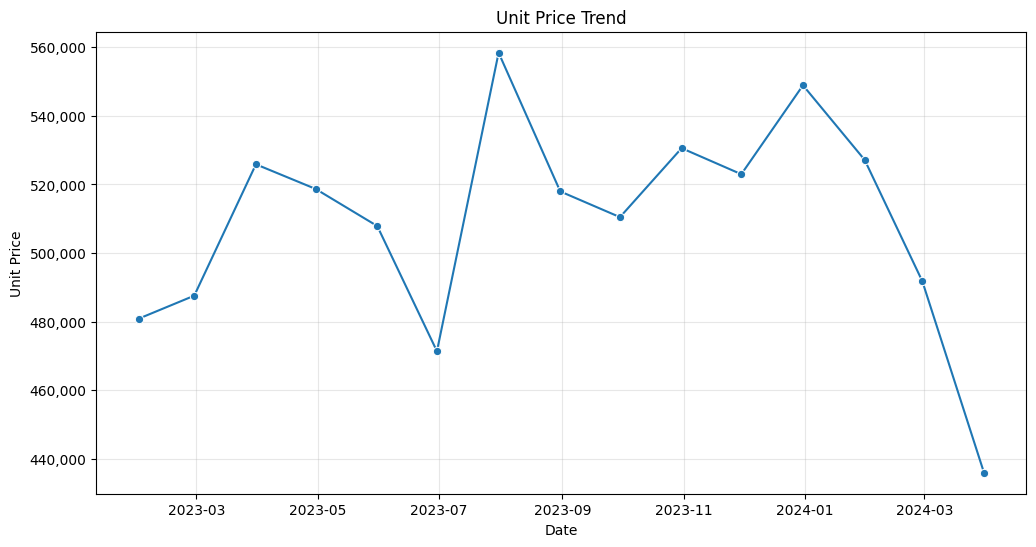

In [24]:
unit_price = df.groupby(pd.Grouper(key="Date", freq = "ME"))["Unit_Price"].sum()

# sales.plot(figsize=(12, 6), marker ='o')

plt.figure(figsize=(12, 6))
sns.lineplot(x=unit_price.index, y=unit_price.values,  marker ='o')

plt.title("Unit Price Trend")
plt.grid(True, alpha = 0.3)
plt.xlabel("Date")
plt.ylabel("Unit Price")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [18]:
df.groupby('Product_Category')[numeric_features].mean()

,Date,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
Product_Category,,,,,,,,,,,
Beauty,2023-08-13 16:54:54.032549632,35.265823,112.009322,2.967450,17.762952,313.940787,14.612568,8.980561,0.884268,6.554702,3.921338
Books,2023-08-17 11:33:53.363554048,34.811423,55.838472,3.049411,8.201718,163.372217,14.649139,8.983681,0.879873,6.602901,3.881233
Electronics,2023-08-12 13:12:54.156219904,35.119094,1766.716461,3.026519,273.952049,5053.952580,14.479267,9.094503,0.880424,6.301350,3.898264
Fashion,2023-08-16 09:42:43.424124416,34.928016,276.358716,2.956226,40.305102,767.040710,14.542315,8.962549,0.879377,6.517023,3.887160
Food,2023-08-15 14:34:24.479315200,35.214456,70.591032,3.034237,11.411826,200.691702,14.449358,9.050880,0.887779,6.457442,3.862577
Home & Garden,2023-08-18 02:33:47.184465920,34.766990,690.938840,2.987864,109.994961,1953.351427,14.466505,8.980583,0.886893,6.474757,3.930097
Sports,2023-08-13 20:28:36.725978624,34.499110,492.898719,3.049822,78.872949,1425.750440,14.529359,8.924822,0.883897,6.554270,3.918149
Toys,2023-08-12 21:18:46.507177216,34.980383,168.968837,3.015789,25.595388,485.281115,14.545455,9.055024,0.874163,6.552632,3.895215


In [19]:
df.groupby('Gender')[numeric_features].mean()

,Date,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
Gender,,,,,,,,,,,
Female,2023-08-14 21:04:57.178683392,34.833740,447.771259,3.011030,72.563635,1281.549356,14.505747,9.014281,0.884361,6.481133,3.904331
Male,2023-08-15 15:32:03.287671296,35.128914,446.957874,3.011497,66.701737,1265.066744,14.560910,8.987647,0.879648,6.511252,3.896282
Other,2023-08-02 21:58:09.230769152,32.896154,481.901769,3.019231,74.899731,1530.316500,14.730769,9.119231,0.884615,7.007692,3.834615


In [20]:
df.groupby('City')[numeric_features].mean()

,Date,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
City,,,,,,,,,,,
Adana,2023-08-09 06:10:19.004525056,34.638763,413.828725,2.957768,62.213597,1140.512964,14.493967,9.022624,0.881599,6.309201,3.889140
Ankara,2023-08-15 14:23:17.192402944,34.881916,438.175533,2.973576,64.862638,1260.298555,14.527250,9.102395,0.868291,6.557391,3.887283
Antalya,2023-08-15 01:54:24.847512064,35.910112,465.554053,3.022472,60.619551,1333.542657,14.669342,9.016051,0.882022,6.529695,3.883628
Bursa,2023-08-13 00:14:13.457292288,34.828007,462.904387,3.054038,83.244689,1346.326612,14.591517,9.047647,0.898896,6.503777,3.945381
Eskisehir,2023-08-15 07:10:22.096317184,34.116147,471.823626,2.987252,70.159221,1287.668229,14.450425,8.895184,0.873938,6.307365,3.906516
Gaziantep,2023-08-15 19:10:17.751479296,34.857988,454.940186,3.014370,62.929425,1330.027261,14.575655,9.097210,0.885038,6.449704,3.874049
Istanbul,2023-08-14 14:19:01.662880512,34.831440,447.131504,3.027942,70.496065,1282.734162,14.491140,8.912994,0.883235,6.511586,3.918219
Izmir,2023-08-21 01:33:07.644787456,35.537645,450.968214,3.019788,77.304276,1279.799189,14.577220,9.025579,0.882239,6.527027,3.876448
Kayseri,2023-08-15 17:34:11.703877632,34.418331,455.121281,3.071680,76.203666,1282.794982,14.410106,9.058754,0.875441,6.609871,3.853114


In [21]:
df.groupby('Payment_Method')[numeric_features].mean()

,Date,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
Payment_Method,,,,,,,,,,,
Bank Transfer,2023-08-12 12:42:52.887124224,34.920590,451.723659,3.041407,65.724475,1311.116988,14.432785,8.965967,0.880318,6.367555,3.897901
Cash on Delivery,2023-08-15 21:45:24.324324352,34.990991,410.238660,2.995495,62.569414,1186.727320,14.551802,8.980856,0.879505,6.649775,3.916667
Credit Card,2023-08-14 16:54:50.339655936,34.844288,457.265470,3.044552,71.781015,1333.585451,14.528158,9.016615,0.882370,6.537568,3.899132
Debit Card,2023-08-15 01:54:58.403147264,35.150660,433.000183,2.958343,62.426378,1192.358905,14.549873,9.003009,0.880583,6.494099,3.917612
Digital Wallet,2023-08-16 22:16:15.824175872,34.887363,456.269505,3.000611,79.504570,1279.561050,14.583333,9.001221,0.885226,6.479243,3.872100


In [22]:
df.groupby('Device_Type')[numeric_features].mean()

,Date,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
Device_Type,,,,,,,,,,,
Desktop,2023-08-15 06:43:17.912745728,34.809581,453.080688,3.008725,68.789548,1310.767677,14.531737,8.959624,0.884859,6.477160,3.894269
Mobile,2023-08-14 00:28:03.998742528,35.004611,443.082194,3.013203,70.321186,1260.472104,14.524992,9.004820,0.881379,6.494708,3.904328
Tablet,2023-08-20 07:29:04.732089088,35.086695,457.366580,3.010235,70.239573,1257.634094,14.610476,9.146297,0.876580,6.647803,3.889223


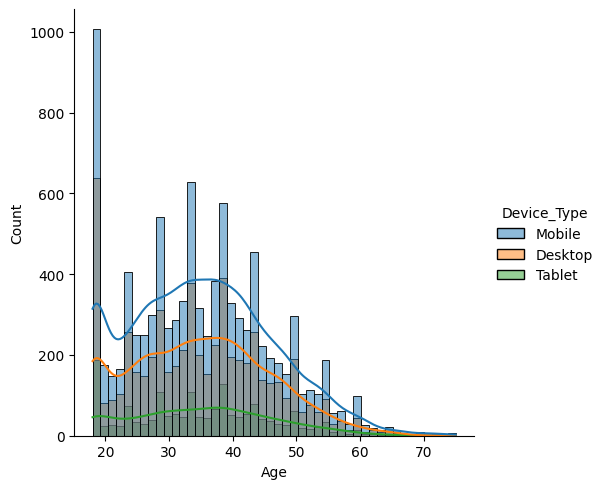

In [23]:
sns.displot(data=df, x="Age", hue="Device_Type", kde=True)